In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#df = pd.read_csv('nopeusdata.csv')



In [89]:
#Jos käytät accelerometer.csv tiedostoa, niin voit lukea tiedoston seuraavasti:
#v = df.speed.values
#t = df.seconds_elapsed.values

v = np.array([0, 1, 2, 3, 4, 5, 4, 1, 1, 0, 0])  # Esimerkki nopeusarvoista
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])     # Esimerkki aika-arvoista

In [90]:
#Derivointi
a = t*0 #alustetaan nollalista kiihtyvyyden arvoille

#lasketaan kiihtyvyys nopeuden numeerisena derivaattana
#peräkkäisten pisteiden välisen suoran kulmakerroin
for i in range(t.shape[0]-1):
    a[i] = (v[i+1]-v[i])/(t[i+1]-t[i])


    #voidaan myös suorittaa sama lasku lyhyemmin
    #a = np.diff(v)/np.diff(t)

In [92]:
#Integrointi, integraalifunktio

#lasketaan kuljettu matka nopeuden integraalina
#Tämä siis vastaa integraali funktiota
dt = np.diff(t) #Datapisteiden välimatkat, voidaan käyttää tätä tai laskea erot
s = t*0 #Alustetaan nollalista integraalin arvoille
for i in range(t.shape[0]-1):
   # s[i+1] = s[i] + (v[i]+v[i+1])/2*(t[i+1]-t[i])
    #Voidaan myös suorittaa sama lasku toisella tavalla

    s[i+1] = s[i] + (v[i]*v[i+1])/2*dt[i]
#Jos näytteenottotaajuus on vakio, eli dt:n arvot ovat kaikki samoja, saadaan sama tulos myös kumulatiivisen summan avullla
    s2 = np.cumsum(v)*dt[0] 
#Jos näytteenottotaajuus on jokseenkin vakio, voidaan melko hyvä arvio saada laskemalla kumulatiivinen summa ja käyttäen dt:n keskiarvoa
    s3 = np.cumsum(v)*np.mean(dt) 

In [99]:
#sama määrätty integraali
#tässä tapauksessa nopeuden määrätty integraali välillä [t1, t2] kertoo tuolla välillä kuljetun matkan
t1 = 0
t2 = 10
i1 = np.argmin(np.abs(t-t1)) #Etsitään se indeksin arvo, jossa aika lähinnä arvoa t1
i2 = np.argmin(np.abs(t-t2)) #Etsitään se indeksin arvo, jossa aika lähinnä arvoa t2

matka = s[i2]-s[i1]

#tai vastaavasti summan avulla, jos dt on jokseenkin vakio
matka2 = np.sum(v[i1:i2])*np.mean(dt[i1:i2])

print('Välillä ',t1,'s ja ',t2,'s kuljettu matka on ', np.round(matka,1),'m')
print('Toisella tavalla laskettuna välillä ',t1,'s ja ',t2,'s kuljettu matka on ', np.round(matka2,1),'m')

#Tulostetaan nopeus, kiihtyvyys ja kuljettu matka




Välillä  0 s ja  10 s kuljettu matka on  32 m
Toisella tavalla laskettuna välillä  0 s ja  10 s kuljettu matka on  21.0 m


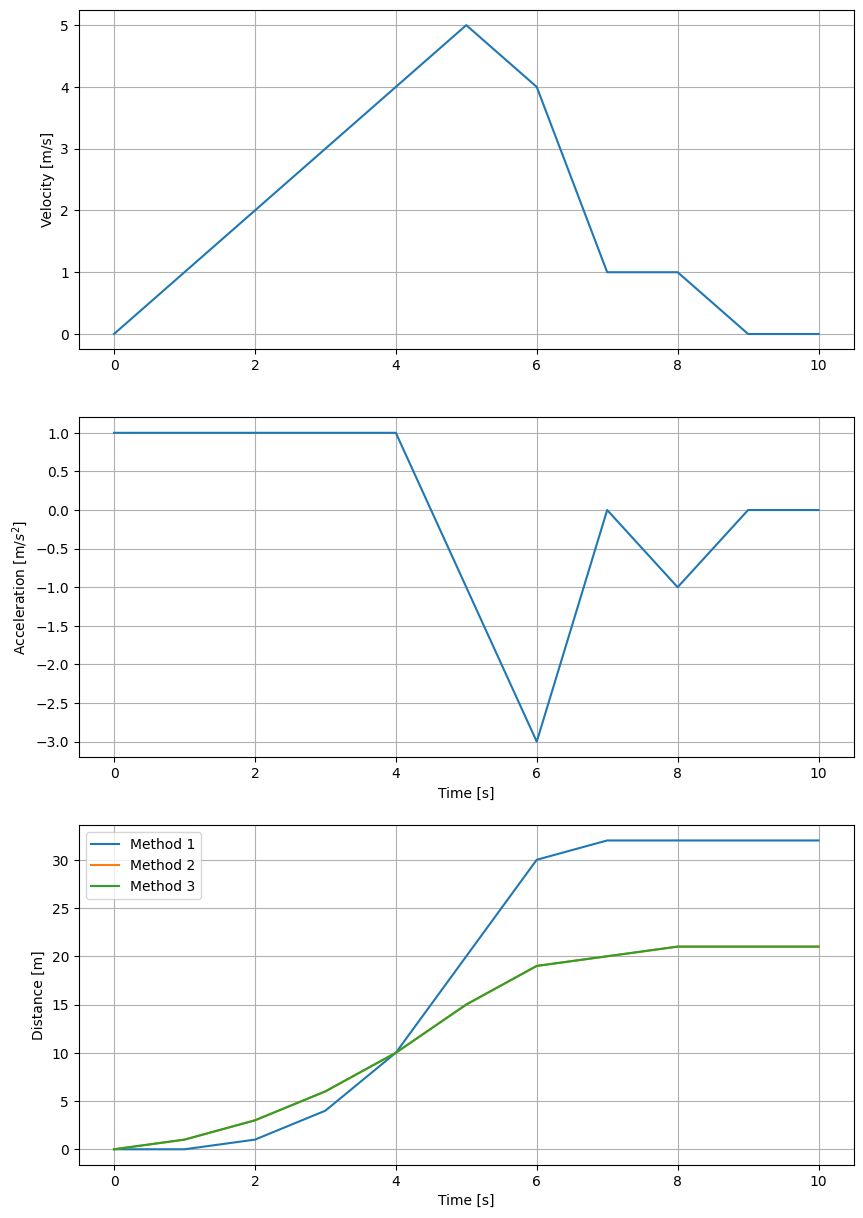

In [94]:
#piirretään nopeuden ja kiihtyvyyden kuvaajat
plt.figure(figsize= [10,15])
plt.subplot(3,1,1)
plt.plot(t,v)
plt.ylabel('Velocity [m/s]')
plt.grid()
plt.subplot(3,1,2)
plt.plot(t,a)
plt.ylabel('Acceleration [m/$s^2$]')
plt.xlabel('Time [s]')
plt.grid()
plt.subplot(3,1,3)
plt.plot(t,s)
plt.plot(t,s2)
plt.plot(t,s3)
plt.ylabel('Distance [m]')
plt.xlabel('Time [s]')
plt.legend(['Method 1','Method 2','Method 3'])
plt.grid()
plt.show()

Välillä 1s ja 9s kuljettu matka on 20.5m
Toisella tavalla laskettuna välillä 1s ja 9s kuljettu matka on 21.0m


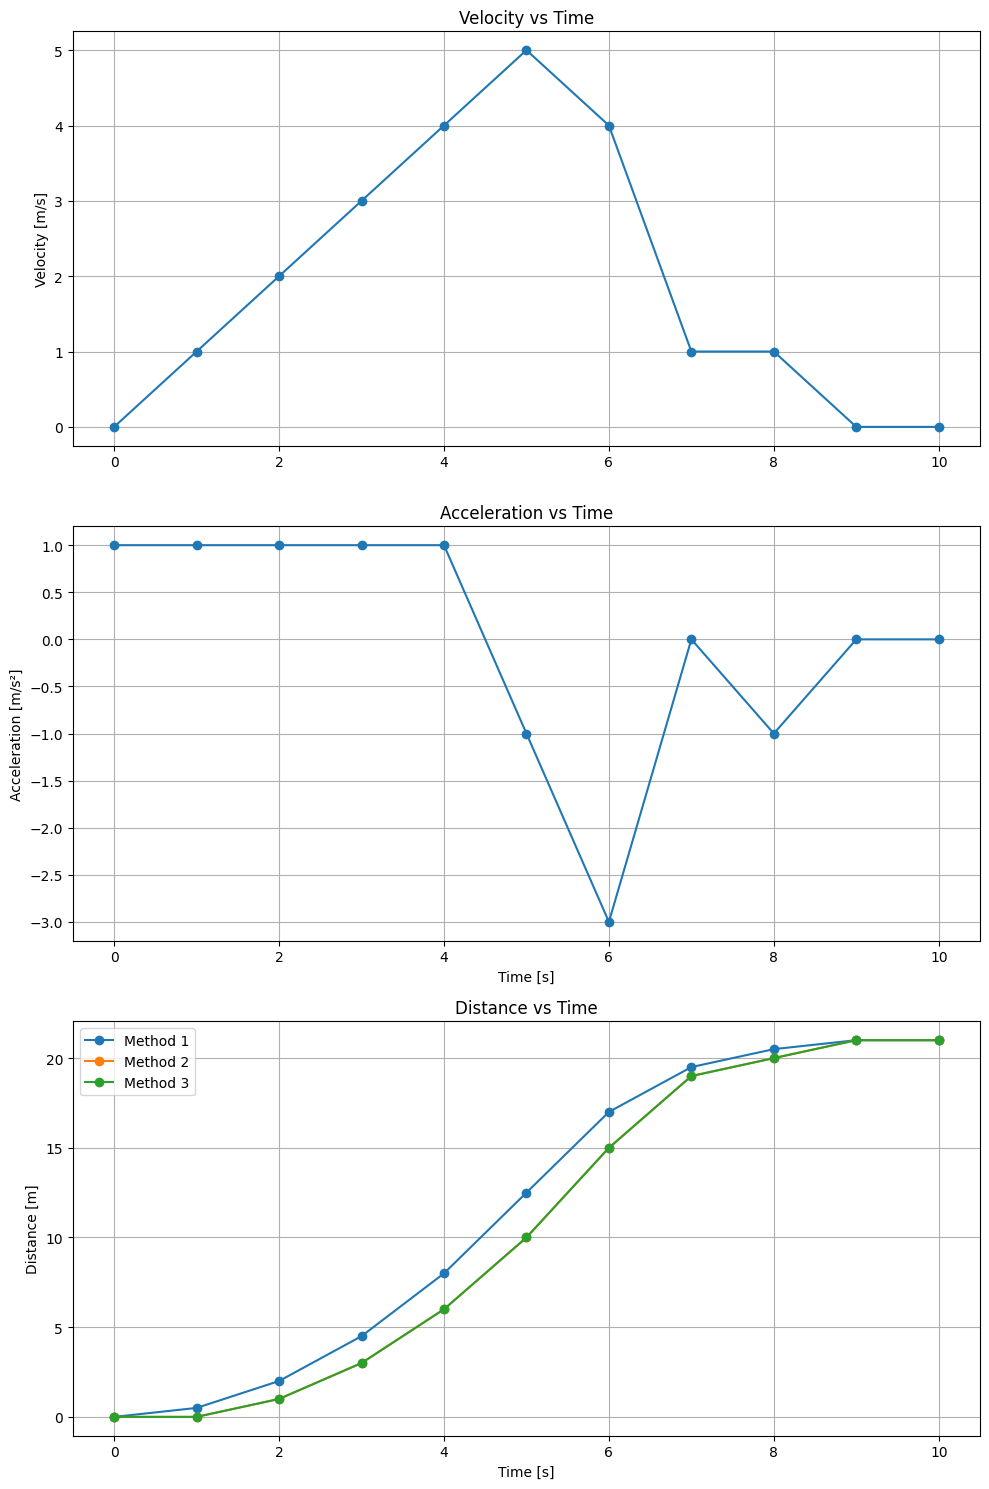

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Alustetaan nopeus ja aika
v = np.array([0, 1, 2, 3, 4, 5, 4, 1, 1, 0, 0])  # Esimerkki nopeusarvoista
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])     # Esimerkki aika-arvoista

# Derivointi
a = np.zeros(len(t))  # Alustetaan nollalista kiihtyvyyden arvoille
for i in range(len(t) - 1):
    a[i] = (v[i+1] - v[i]) / (t[i+1] - t[i])

# Integrointi
dt = np.diff(t)  # Datapisteiden välimatkat
s = np.zeros(len(t))  # Alustetaan nollalista integraalin arvoille
for i in range(len(t) - 1):
    s[i+1] = s[i] + (v[i] + v[i+1]) / 2 * (t[i+1] - t[i])

# Kumulatiiviset metodit
s2 = np.cumsum(v[:-1]) * dt[0]
s3 = np.cumsum(v[:-1]) * np.mean(dt)

# Korjatut arvot t1 ja t2, jotka ovat t-taulukon sisällä
t1 = t[1]  # Valitaan esimerkiksi t-taulukon toinen arvo
t2 = t[-2]  # Valitaan esimerkiksi t-taulukon toiseksi viimeinen arvo

# Indeksien etsiminen
i1 = np.argmin(np.abs(t - t1))
i2 = np.argmin(np.abs(t - t2))

# Lasketaan matka i1 ja i2 indeksien välillä
matka = s[i2] - s[i1]

# Lasketaan matka summan avulla
matka2 = np.sum(v[i1:i2]) * np.mean(dt)

# Tulostetaan lasketut matkat
print(f'Välillä {t1}s ja {t2}s kuljettu matka on {np.round(matka, 1)}m')
print(f'Toisella tavalla laskettuna välillä {t1}s ja {t2}s kuljettu matka on {np.round(matka2, 1)}m')

# Piirretään nopeuden, kiihtyvyyden ja kuljetun matkan kuvaajat
plt.figure(figsize=[10, 15])

# Nopeus vs aika
plt.subplot(3, 1, 1)
plt.plot(t, v, marker='o')
plt.title('Velocity vs Time')
plt.ylabel('Velocity [m/s]')
plt.grid(True)

# Kiihtyvyys vs aika
plt.subplot(3, 1, 2)
plt.plot(t, a, marker='o')
plt.title('Acceleration vs Time')
plt.ylabel('Acceleration [m/s²]')
plt.xlabel('Time [s]')
plt.grid(True)

# Matka vs aika
plt.subplot(3, 1, 3)
plt.plot(t, s, marker='o', label='Method 1')
plt.plot(t, np.insert(s2, 0, 0), marker='o', label='Method 2')  # Lisätään nolla alkuun s2:lle
plt.plot(t, np.insert(s3, 0, 0), marker='o', label='Method 3')  # Lisätään nolla alkuun s3:lle
plt.title('Distance vs Time')
plt.ylabel('Distance [m]')
plt.xlabel('Time [s]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()